In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
def retrieve_stock_data(stock_symbol,start_date,end_date):
    data = yf.download(stock_symbol, start = start_date,end=end_date)
    return data

In [3]:
stock_data = retrieve_stock_data("AAPL","2020-01-01","2023-09-01")

[*********************100%%**********************]  1 of 1 completed


In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249031,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536903,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114883,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941643,132079200


In [5]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-25,177.380005,179.149994,175.820007,178.610001,178.610001,51449600
2023-08-28,180.089996,180.589996,178.550003,180.190002,180.190002,43820700
2023-08-29,179.699997,184.899994,179.500000,184.119995,184.119995,53003900
2023-08-30,184.940002,187.850006,184.740005,187.649994,187.649994,60813900
2023-08-31,187.839996,189.119995,187.479996,187.869995,187.869995,60794500


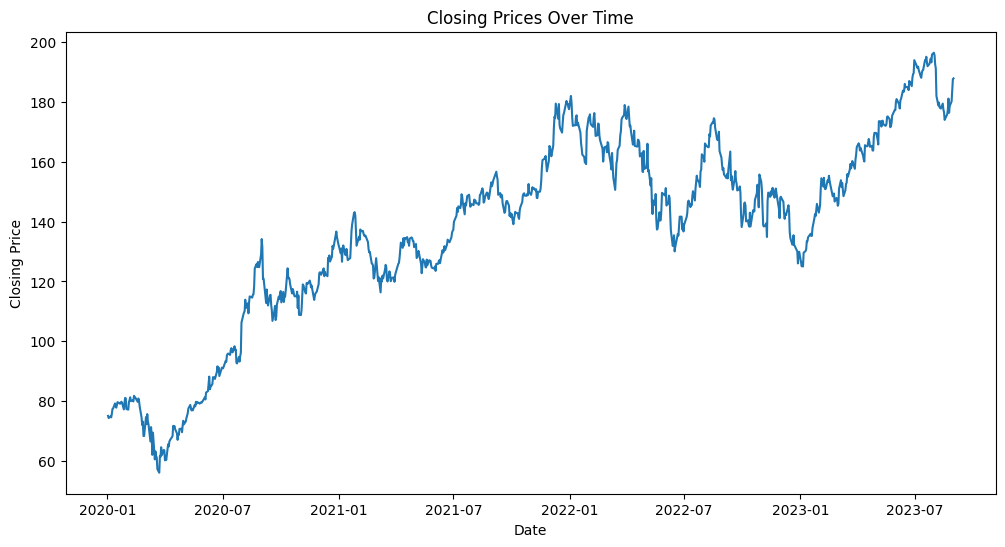

In [6]:
plt.figure(figsize=(12,6))
plt.plot(stock_data["Close"])
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [7]:
train_size = int(len(stock_data)*0.8)
train_data,test_data = stock_data[:train_size],stock_data[train_size:]

In [8]:
print(len(train_data))
print(len(test_data))

738
185


In [9]:
train_data = train_data["Close"]
test_data = test_data["Close"]

In [10]:
def find_best_arima_order(data,p_values,d_values,q_values):
    best_score,best_cfg = float("inf"),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(data, order=(p,d,q))
                    model_fit = model.fit()
                    mse = mean_squared_error(data,model_fit.fittedvalues)
                    if mse < best_score:
                        best_score,best_cfg = mse,(p,q,d)
                except:
                    continue
    return best_cfg                    

In [11]:
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

In [12]:
best_cfg = find_best_arima_order(train_data,p_values,d_values,q_values)
print("Best ARIMA parameteres:ARIMA{}".format(best_cfg))

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provide

Best ARIMA parameteres:ARIMA(1, 2, 0)


In [13]:
model = ARIMA(train_data,order=best_cfg)
model_fit = model.fit()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
forcasted_values = model_fit.forecast(steps=len(test_data))

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [15]:
mse = mean_squared_error(test_data,forcasted_values)
print("Mean Squared Error(MSE): {:.2f}".format(mse))

Mean Squared Error(MSE): 16006.85


In [16]:
forcasted_values = model_fit.forecast(steps = 180)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
forecast_dates = pd.date_range(start = test_data.index[-1],periods=180,freq="D")

In [18]:
forecast_df = pd.DataFrame({"Date": forecast_dates,"Forecasted":forcasted_values})

In [19]:
forecast_df.head()

,Date,Forecasted
738,2023-08-31,145.803136
739,2023-09-01,144.792888
740,2023-09-02,143.877870
741,2023-09-03,142.913399
742,2023-09-04,141.974609


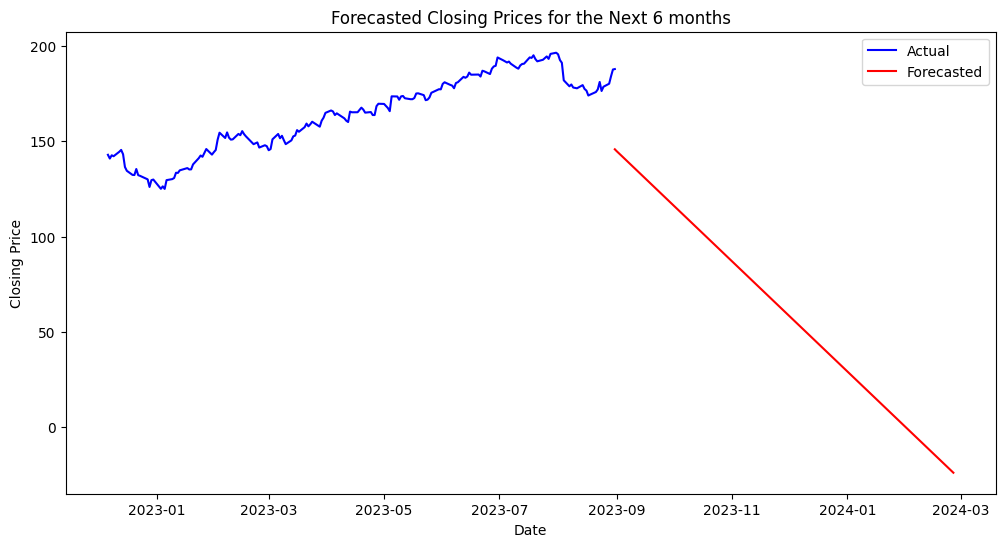

In [21]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label = "Actual",color = "b")
plt.plot(forecast_df["Date"], forecast_df["Forecasted"],label = "Forecasted" , color = "r")
plt.title("Forecasted Closing Prices for the Next 6 months")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()